In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

AttributeError: module 'cgi' has no attribute 'escape'

Software versions
Python 3.9.1 64bit [GCC 5.4.0 20160609]
IPython 7.19.0
OS Linux 5.8.0 0.bpo.2 amd64 x86_64 with glibc2.28
pandas 1.2.0
matplotlib 3.3.3
seaborn 0.11.1
Sun Jan 10 13:42:25 2021 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'TRX'

In [5]:
def datetime_trx_supply_curve(num_weeks):
    supply = [
        # Total distribution,
    ]
    start_date = datetime.datetime(2017, 9, 1)
    y = 66 * 1e9
    weekly_distribution = 500 * 1e6 / 52
    yearly_distribution = 33 * 1e9 / 20
    supply.append([y])
    for week in range(num_weeks):
        y += weekly_distribution
        if ((week % 52 == 0) &
            (week > 0) &
            (week <= 1040)):
            y += yearly_distribution
        supply.append([y])
    
    df = pd.DataFrame(
        supply, columns=['total_supply']
    )
    df['total_supply_pct'] = (
        df['total_supply'] / df['total_supply'].values[-1]
        * 100
    )
    df['date'] = pd.date_range(
        start=start_date,
        freq='W',
        periods=len(df)
    )
    return df

In [6]:
supply = datetime_trx_supply_curve(num_weeks=6350)
display(supply.head())
display(supply.tail())

,total_supply,total_supply_pct,date
0,6.600000e+10,41.235132,2017-09-03
1,6.600962e+10,41.241139,2017-09-10
2,6.601923e+10,41.247146,2017-09-17
3,6.602885e+10,41.253154,2017-09-24
4,6.603846e+10,41.259161,2017-10-01


,total_supply,total_supply_pct,date
6346,1.600192e+11,99.975970,2139-04-19
6347,1.600288e+11,99.981978,2139-04-26
6348,1.600385e+11,99.987985,2139-05-03
6349,1.600481e+11,99.993993,2139-05-10
6350,1.600577e+11,100.000000,2139-05-17


<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

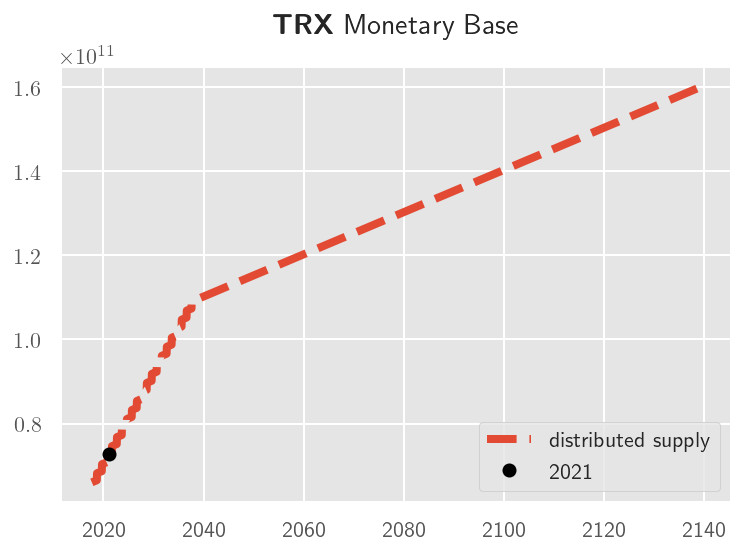

In [7]:
cmb.plot_supply_curve(
    supply,
    'TRX',
    fmt='--',
    plot_pct=False,
    out_name='TRX',
);

<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

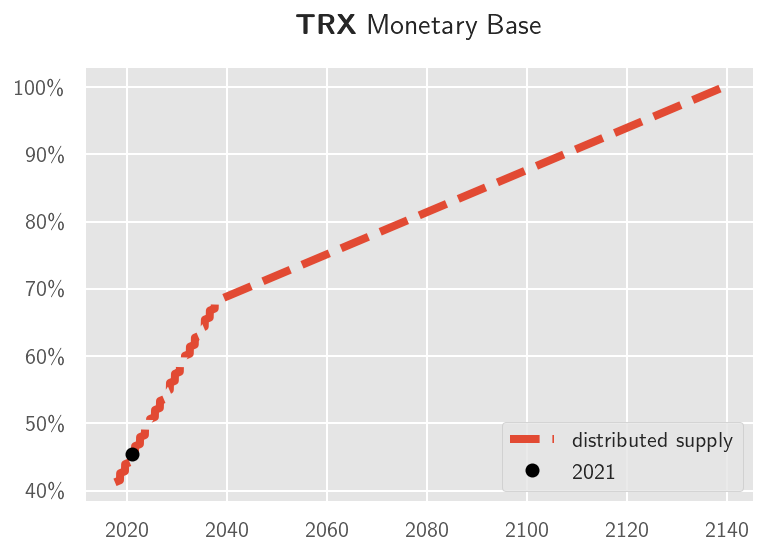

In [8]:
cmb.plot_supply_curve(
    supply,
    'TRX',
    fmt='--',
    out_name='TRX_pct',
);

## Standardize Time Series

In [9]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 6351 lines to file ../output-data/TRX_weekly.csv


,coin,total_supply,total_supply_pct,date
0,TRX,6.600000e+10,41.235132,2017-09-01
1,TRX,6.600962e+10,41.241139,2017-09-01
2,TRX,6.601923e+10,41.247146,2017-09-01
3,TRX,6.602885e+10,41.253154,2017-09-01
4,TRX,6.603846e+10,41.259161,2017-10-01


,coin,total_supply,total_supply_pct,date
6346,TRX,1.600192e+11,99.975970,2139-04-01
6347,TRX,1.600288e+11,99.981978,2139-04-01
6348,TRX,1.600385e+11,99.987985,2139-05-01
6349,TRX,1.600481e+11,99.993993,2139-05-01
6350,TRX,1.600577e+11,100.000000,2139-05-01


In [10]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 1461 lines to file ../output-data/TRX_monthly.csv


,coin,total_supply,total_supply_pct,date
0,TRX,6.600000e+10,41.235132,2017-09-01
1,TRX,6.603846e+10,41.259161,2017-10-01
2,TRX,6.608654e+10,41.289199,2017-11-01
3,TRX,6.612500e+10,41.313228,2017-12-01
4,TRX,6.617308e+10,41.343266,2018-01-01


,coin,total_supply,total_supply_pct,date
1456,TRX,1.598750e+11,99.885858,2139-01-01
1457,TRX,1.599135e+11,99.909888,2139-02-01
1458,TRX,1.599519e+11,99.933918,2139-03-01
1459,TRX,1.600000e+11,99.963955,2139-04-01
1460,TRX,1.600385e+11,99.987985,2139-05-01


In [11]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 123 lines to file ../output-data/TRX_yearly.csv


,coin,total_supply,total_supply_pct,date
0,TRX,6.600000e+10,41.235132,2017-09-01
1,TRX,6.617308e+10,41.343266,2018-01-01
2,TRX,6.832308e+10,42.686531,2019-01-01
3,TRX,7.047308e+10,44.029797,2020-01-01
4,TRX,7.262308e+10,45.373063,2021-01-01


,coin,total_supply,total_supply_pct,date
118,TRX,1.578654e+11,98.630302,2135-01-01
119,TRX,1.583654e+11,98.942689,2136-01-01
120,TRX,1.588750e+11,99.261084,2137-01-01
121,TRX,1.593750e+11,99.573471,2138-01-01
122,TRX,1.598750e+11,99.885858,2139-01-01
